In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import ssl

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

nltk.download('wordnet')

from nltk import sent_tokenize
from nltk import word_tokenize

from nltk.stem import WordNetLemmatizer 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import torch
from transformers import BertTokenizer


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import
df=pd.read_csv('enron_removed.csv')
df['message_id']=df['message_id'].astype(str)
df['subject']=df['subject'].astype(str)
df['content']=df['content'].astype(str)

# to lower type
df['content']=df['content'].str.lower()
df['subject']=df['subject'].str.lower()

# remove punctuations
df['content'] = df['content'].str.replace('[^\w\s]','')
df['subject'] = df['subject'].str.replace('[^\w\s]','')

'''
# remove combination of words and digits
df['content'] = df['content'].str.replace('W*dw*','')
df['subject'] = df['subject'].str.replace('W*dw*','')
'''

# tokenization
df["content"] = df["content"].apply(lambda x: nltk.word_tokenize(x))
df["subject"] = df["subject"].apply(lambda x: nltk.word_tokenize(x))

# porter stemming
ps = PorterStemmer()
df["content"] = df["content"].apply(lambda x: [ps.stem(i) for i in x])
df["subject"] = df["subject"].apply(lambda x: [ps.stem(i) for i in x])

# snowball stemming
ss = SnowballStemmer(language = "english")
df["content"] = df["content"].apply(lambda x: [ss.stem(i) for i in x])
df["subject"] = df["subject"].apply(lambda x: [ss.stem(i) for i in x])

# lemmantization
lemmatizer = WordNetLemmatizer()
df["content"] = df["content"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df["subject"] = df["subject"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

# join text back
def join_words(text):
    return " ".join(text)
df["subject"] = df["subject"].apply(lambda x: join_words(x))
df["content"] = df["content"].apply(lambda x: join_words(x))

df

C:\Users\hp\AppData\Local\Temp\ipykernel_4392\1823949549.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')
C:\Users\hp\AppData\Local\Temp\ipykernel_4392\1823949549.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['subject'] = df['subject'].str.replace('[^\w\s]','')


,message_id,subject,content,cat_1_level_2
0,<9831685.1075855725804.JavaMail.evans@thyme>,re confidenti employ informationlenhart,i also need to know the base salari of jay rei...,1
1,<21041312.1075855725847.JavaMail.evans@thyme>,re person and confidenti compen inform,thank for the inform it would be help if you w...,3
2,<21261996.1075858638025.JavaMail.evans@thyme>,re western whole activ ga power conf call priv...,can you guy coordin to make sure someon listen...,4
3,<20399547.1075857614321.JavaMail.evans@thyme>,re confidenti employ informationdutch quigley,thx jeani slone 12192000 0451 pm to john arnol...,5
4,<860767.1075849626951.JavaMail.evans@thyme>,re hp confidenti intern document,thi is an excel updat thank for put thi togeth...,1
...,...,...,...,...
1485,<18361957.1075861368310.JavaMail.evans@thyme>,confidenti due dilig info g,there is a lot of confidenti inform here in it...,1
1486,<29049822.1075842045435.JavaMail.evans@thyme>,california dim bulb,you may have seen thi when it first came out a...,1
1487,<205897.1075861997314.JavaMail.evans@thyme>,re confidenti ee info,mark can you email me or fax me ani written do...,5
1488,<23743848.1075863311776.JavaMail.evans@thyme>,confidenti inform and secur trade,towilliam william emailbwillia5enroncom 503464...,1


In [3]:
''' 
from sklearn.utils import resample
for i in [2,3,4,5,6,7]:
    spam_upsample = resample(df[df['cat_1_level_2']==i],
             replace=True,
             n_samples=len(df[df['cat_1_level_2']==1]) - len(df[df['cat_1_level_2']==i]),
             random_state=42)
    df=pd.concat([df,spam_upsample])
df
'''

" \nfrom sklearn.utils import resample\nfor i in [2,3,4,5,6,7]:\n    spam_upsample = resample(df[df['cat_1_level_2']==i],\n             replace=True,\n             n_samples=len(df[df['cat_1_level_2']==1]) - len(df[df['cat_1_level_2']==i]),\n             random_state=42)\n    df=pd.concat([df,spam_upsample])\ndf\n"

In [4]:
df_content=df['content']
df_message_id=df['message_id']
df_subject=df['subject']
df_label=df['cat_1_level_2'].astype('int')
df_content.to_csv('content.csv', index=False)
df_message_id.to_csv('message_id.csv', index=False)
df_label.to_csv('label.csv', index=False)
df_subject.to_csv('subject.csv', index=False)

df.to_csv('BERT_data.csv', index=False)


<Axes: >

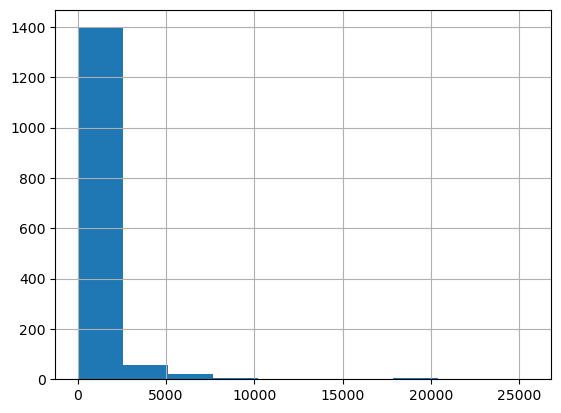

In [228]:
# character length
df['content'].str.len().hist()

<Axes: >

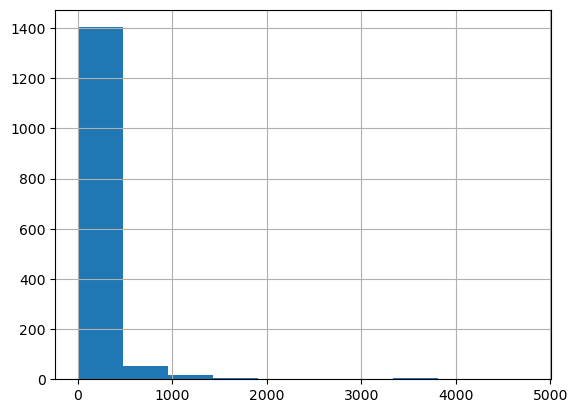

In [229]:
# total word length
def sentence_len(sentence):
    return len(sentence.split())

df['content'].apply(lambda x: sentence_len(x)).hist()

C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: >

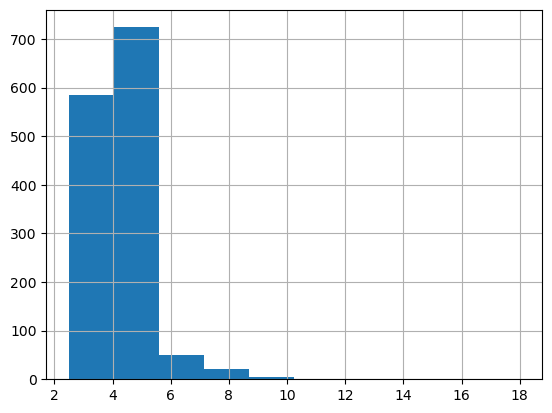

In [230]:
# average word length
df['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

1.	CC	Coordinating conjunction
2.	CD	Cardinal number
3.	DT	Determiner
4.	EX	Existential there
5.	FW	Foreign word
6.	IN	Preposition or subordinating conjunction
7.	JJ	Adjective
8.	JJR	Adjective, comparative
9.	JJS	Adjective, superlative
10.	LS	List item marker
11.	MD	Modal
12.	NN	Noun, singular or mass
13.	NNS	Noun, plural
14.	NNP	Proper noun, singular
15.	NNPS	Proper noun, plural
16.	PDT	Predeterminer
17.	POS	Possessive ending
18.	PRP	Personal pronoun
19.	PRP$	Possessive pronoun
20.	RB	Adverb
21.	RBR	Adverb, comparative
22.	RBS	Adverb, superlative
23.	RP	Particle
24.	SYM	Symbol
25.	TO	to
26.	UH	Interjection
27.	VB	Verb, base form
28.	VBD	Verb, past tense
29.	VBG	Verb, gerund or present participle
30.	VBN	Verb, past participle
31.	VBP	Verb, non-3rd person singular present
32.	VBZ	Verb, 3rd person singular present
33.	WDT	Wh-determiner
34.	WP	Wh-pronoun
35.	WP$$	Possessive wh-pronoun
36.	WRB	Wh-adverb

In [231]:
# word count
new= df['content'].str.split()
new=df['content'].values.tolist()
corpus=[word for i in new for word in i.split()]
wo_li={}
for wo in corpus: 
    wo_li[wo] = wo_li.get(wo, 0) + 1    

In [232]:
wo_li = dict(sorted(wo_li.items(), key=lambda item: item[1], reverse=True))
wo_li

pos_tags = pos_tag(wo_li.keys())
pos_tags

[('the', 'DT'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('and', 'CC'),
 ('of', 'IN'),
 ('in', 'IN'),
 ('that', 'DT'),
 ('on', 'IN'),
 ('is', 'VBZ'),
 ('i', 'JJ'),
 ('for', 'IN'),
 ('it', 'PRP'),
 ('thi', 'VBZ'),
 ('be', 'VB'),
 ('with', 'IN'),
 ('we', 'PRP'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('will', 'MD'),
 ('are', 'VBP'),
 ('at', 'IN'),
 ('not', 'RB'),
 ('from', 'IN'),
 ('by', 'IN'),
 ('would', 'MD'),
 ('if', 'IN'),
 ('or', 'CC'),
 ('market', 'NN'),
 ('power', 'NN'),
 ('price', 'NN'),
 ('enron', 'NN'),
 ('california', 'NN'),
 ('wa', 'NN'),
 ('but', 'CC'),
 ('he', 'PRP'),
 ('an', 'DT'),
 ('ha', 'NN'),
 ('your', 'PRP$'),
 ('our', 'PRP$'),
 ('they', 'PRP'),
 ('said', 'VBD'),
 ('energi', 'NN'),
 ('subject', 'NN'),
 ('about', 'IN'),
 ('do', 'VBP'),
 ('meet', 'VB'),
 ('time', 'NN'),
 ('me', 'PRP'),
 ('20', 'CD'),
 ('electr', 'JJ'),
 ('state', 'NN'),
 ('ferc', 'NNS'),
 ('can', 'MD'),
 ('ani', 'VB'),
 ('cc', 'NN'),
 ('which', 'WDT'),
 ('there', 'RB'),
 ('need', 'VBP'),
 ('what', 'WP'),
 ('like', 'I

<BarContainer object of 15 artists>

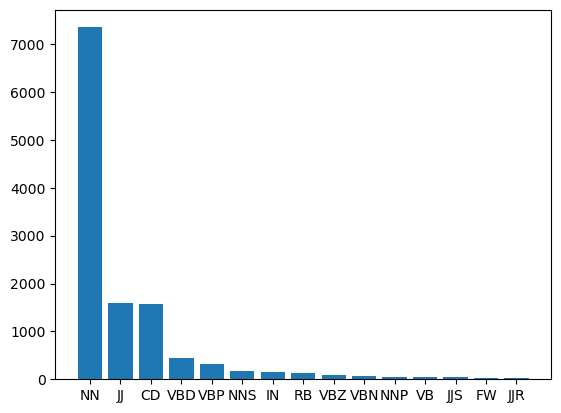

In [233]:
pos_li={}
for x,pos in pos_tags: 
    pos_li[pos] = pos_li.get(pos, 0) + 1 
pos_li = dict(sorted(pos_li.items(), key=lambda item: item[1], reverse=True))
pos_li
plt.bar(list(pos_li.keys())[:15],list(pos_li.values())[:15])

In [234]:
pos_tags[1][1]

'TO'

In [235]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 15 artists>

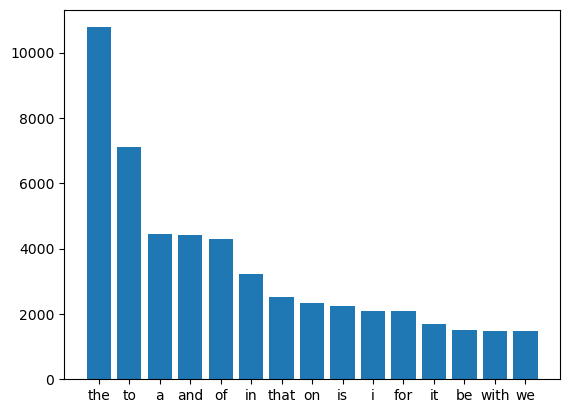

In [236]:
stop_wo_li={}
for wo,i in wo_li.items():
    if wo in stop:
        stop_wo_li[wo]=i
plt.bar(list(stop_wo_li.keys())[:15],list(stop_wo_li.values())[:15])

<BarContainer object of 5 artists>

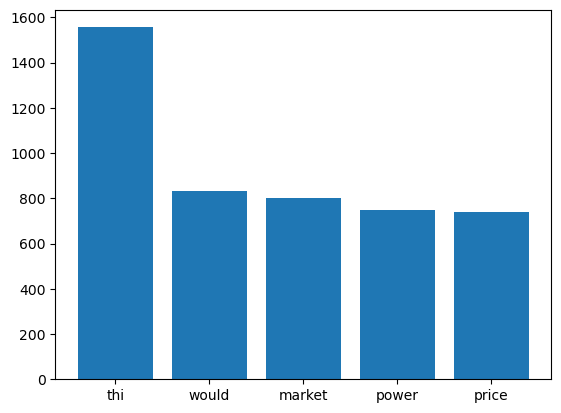

In [237]:
for st_wo in stop:
    if st_wo in wo_li:
        wo_li.pop(st_wo)
wo_li
plt.bar(list(wo_li.keys())[:5],list(wo_li.values())[:5])

In [238]:
wo_li

{'thi': 1556,
 'would': 833,
 'market': 800,
 'power': 747,
 'price': 741,
 'enron': 726,
 'california': 700,
 'wa': 699,
 'ha': 639,
 'said': 542,
 'energi': 535,
 'subject': 522,
 'meet': 489,
 'time': 481,
 '20': 475,
 'electr': 473,
 'state': 472,
 'ferc': 465,
 'ani': 440,
 'cc': 436,
 'need': 423,
 'like': 416,
 'plea': 415,
 'get': 408,
 'thank': 395,
 'j': 383,
 'inform': 381,
 'gener': 377,
 'know': 372,
 'imag': 368,
 'issu': 365,
 'pm': 348,
 'may': 348,
 'new': 347,
 'one': 343,
 'think': 339,
 'make': 334,
 'call': 328,
 'hi': 327,
 'compani': 327,
 'steven': 322,
 'work': 317,
 'u': 314,
 'week': 310,
 'could': 308,
 'go': 307,
 'also': 297,
 'busi': 295,
 'jeff': 290,
 'discus': 278,
 'want': 271,
 'mark': 263,
 'look': 260,
 'let': 260,
 'committ': 260,
 'polici': 259,
 'trade': 256,
 'iso': 252,
 'use': 249,
 'provid': 246,
 'includ': 241,
 'bill': 239,
 'attach': 235,
 'report': 234,
 'cap': 233,
 'steve': 233,
 'email': 231,
 'keannaenronenron': 222,
 'take': 221,
 '

In [239]:
# Stemming and Lemmatization